In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Embedding, Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from matplotlib import pyplot as plt
from IPython import display
import soundfile as sf
from keras.models import load_model
from sklearn.metrics import top_k_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
SAMPLING_RATE = 22050

In [3]:
data = tf.keras.utils.audio_dataset_from_directory('./data', seed=7, batch_size=1000)

Found 999 files belonging to 10 classes.


In [4]:
class_names = data.class_names
class_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [5]:
X = []
y = []

for (x, l) in data.as_numpy_iterator():
    X = x
    y = l

In [6]:
def play_sound(x):
    sf.write("./preview_data/test_sound.wav",x,SAMPLING_RATE)
    display.display(display.Audio("./preview_data/test_sound.wav"))

(999, 675808, 1)

In [7]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=27)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, stratify=y_test_val, test_size=0.6, random_state=27)

In [8]:
# def splitting_data(X,y):
#     newX = []
#     newY = []

#     X_len = X[0].shape[0]
#     res = X_len%5
  
#     n = X.shape[0]

#     for i in range(n):
#         X_pom = X[i][:-(res)]
#         pom = np.split(X_pom,5)
#         for j in range(5):
#             newX.append(pom[j])
#             newY.append(y[i])

#     return np.array(newX), np.array(newY)

In [9]:
import random

In [35]:
def splitting_data(X,y):
    newX = []
    newY = []

    X_len = X[0].shape[0]
    res = X_len%5
  
    n = X.shape[0]
    print(res)
    for i in range(n):
        X_pom = X[i][:-(res)]
        pom = np.split(X_pom,5)
        newX.append(pom[random.randint(0,4)][:])
    return np.array(newX), y

In [36]:
#newX_train, newy_train = splitting_data(X_train,y_train)
newX_test, newy_test = splitting_data(X_test,y_test)
newX_val, newy_val = splitting_data(X_val, y_val)

3
3


In [37]:
newX_test.shape

(120, 135161, 1)

In [38]:
newy_test.shape

(120,)

## Loading and comparing trained Conv1D models

In [40]:
model_1 = load_model('./1D_Conv_models/model-0.01rate.h5')
model_2 = load_model('./1D_Conv_models/model-0.001rate.h5')
model_3 = load_model('./1D_Conv_models/model-0.0001rate.h5')

In [41]:
top_3_array = []
acc_array = []

In [42]:
def accuracy_fun(model):
    y_pred_prob = model.predict(newX_val)
    top3 = top_k_accuracy_score(newy_val, y_pred_prob,k=3)
    top_3_array.append(top3)
    print(f"Top_3_accuracy: {top3}")
    acc = accuracy_score(newy_val, [np.argmax(x) for x in y_pred_prob] )
    acc_array.append(acc)
    print(f"Classic accuracy: {acc}")

In [43]:
accuracy_fun(model_1)

6/6 [==============================] - 5s 725ms/step
Top_3_accuracy: 0.5611111111111111
Classic accuracy: 0.24444444444444444


In [44]:
accuracy_fun(model_2)

6/6 [==============================] - 5s 671ms/step
Top_3_accuracy: 0.9111111111111111
Classic accuracy: 0.6944444444444444


In [45]:
accuracy_fun(model_3)

6/6 [==============================] - 4s 633ms/step
Top_3_accuracy: 0.8111111111111111
Classic accuracy: 0.48333333333333334


6/6 [==============================] - 4s 647ms/step
Top_3_accuracy: 0.4111111111111111
Classic accuracy: 0.15


In [47]:
top_3_array

[0.5611111111111111,
 0.9111111111111111,
 0.8111111111111111,
 0.4111111111111111]

In [48]:
acc_array

[0.24444444444444444, 0.6944444444444444, 0.48333333333333334, 0.15]

In [49]:
labels = ["model_0.01rate", "model_0.001rate", "model_0.0001rate", "model_0.00001rate"]

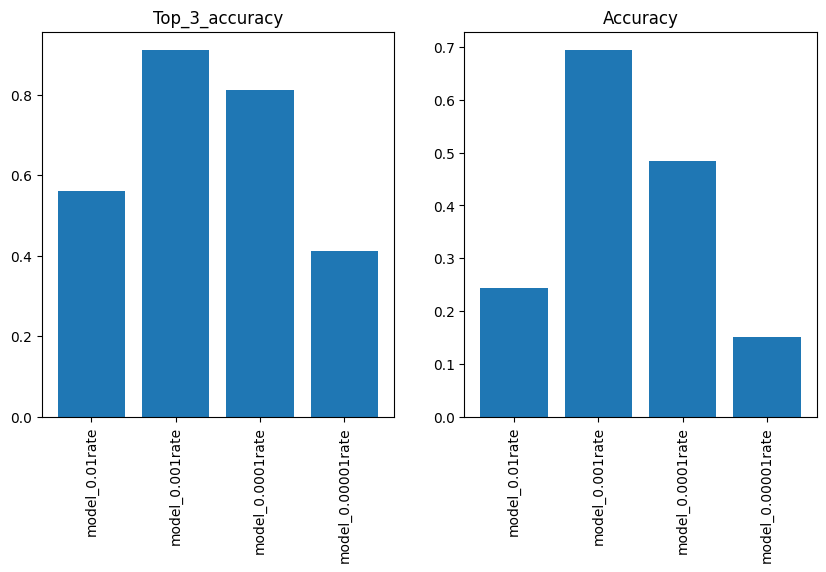

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar([0,1,2,3],top_3_array)
plt.xticks([0,1,2,3],labels=labels, rotation=90)
plt.title("Top_3_accuracy")

plt.subplot(1,2,2)
plt.bar([0,1,2,3],acc_array)
plt.xticks([0,1,2,3],labels=labels, rotation=90)
plt.title("Accuracy")

plt.show()

Based on previous results and plots we can see that model with a learning rate of 0.001 gives best results, so that is the model that will be evaluated on test data.

## Evaluation of winning model

In [51]:
model = model_2
#TODO: evaluacija nad testom, accuracy_score, top_3_accuracy, confusion_matrix
#TODO: plotovanje tih rezultata
#TODO: primeri pogresnig instanci

In [52]:
model.evaluate(newX_test)

4/4 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [53]:
y_prob = model.predict(newX_test)

4/4 [==============================] - 3s 672ms/step


In [54]:
y_prob

array([[9.67181250e-02, 2.01308504e-01, 2.71170348e-01, ...,
        3.41847949e-02, 6.27493346e-03, 1.75705567e-01],
       [3.74936461e-02, 6.33240163e-01, 3.98414060e-02, ...,
        7.75582194e-02, 3.30650597e-03, 4.64675613e-02],
       [5.57798184e-02, 1.74879849e-01, 1.95886657e-01, ...,
        7.45318830e-02, 2.84833331e-02, 8.07483271e-02],
       ...,
       [2.93488522e-08, 6.13131675e-21, 1.28373912e-09, ...,
        7.09514949e-04, 5.86191134e-04, 2.01914006e-08],
       [2.58099841e-04, 9.79566775e-12, 4.86537247e-05, ...,
        2.52190195e-02, 1.13204494e-01, 1.86080259e-04],
       [2.62329374e-02, 2.22431824e-01, 2.56509483e-02, ...,
        4.71286476e-02, 1.45646138e-02, 2.69185007e-02]], dtype=float32)

In [55]:
top_3_res = top_k_accuracy_score(newy_test, y_prob,k=3)
top_3_res

0.9166666666666666

In [56]:
acc_3_res = accuracy_score(newy_test, [np.argmax(x) for x in y_prob] )
acc_3_res

0.775

In [57]:
class_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [58]:
conf_matrix = confusion_matrix(newy_test,[np.argmax(x) for x in y_prob])
conf_matrix

array([[ 6,  0,  0,  0,  1,  2,  2,  0,  0,  1],
       [ 0, 10,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  0, 10,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  9,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  9,  0,  0,  1,  1,  0],
       [ 2,  0,  0,  0,  0,  9,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 11,  0],
       [ 0,  0,  1,  1,  0,  2,  0,  1,  0,  7]], dtype=int64)

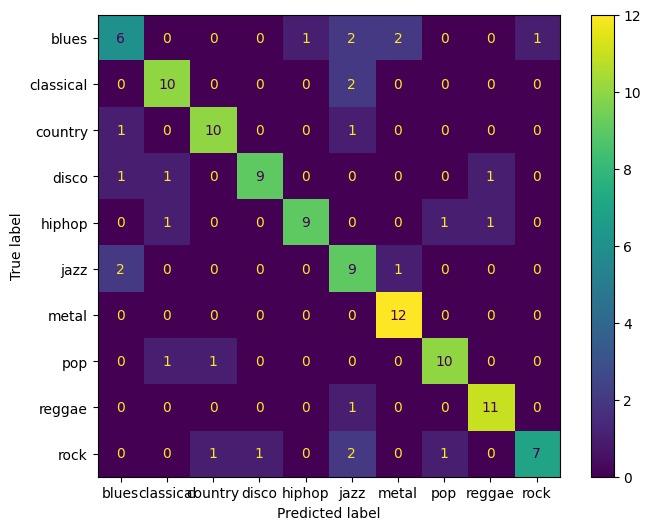

In [59]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display_matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
display_matrix.plot(ax=ax)

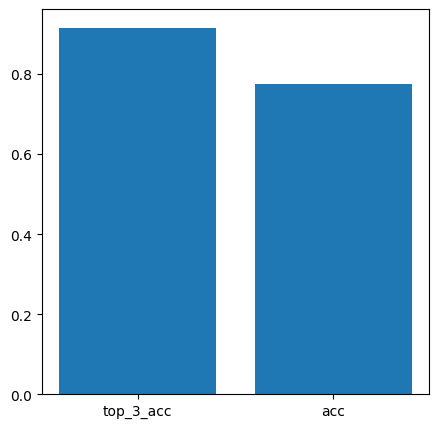

In [60]:
plt.figure(figsize=(5,5))
plt.bar([0,1],[top_3_res,acc_3_res])
plt.xticks([0,1],labels=['top_3_acc','acc'])
plt.show()

In [61]:
#!pip install gradio
#!pip install typing-extensions --upgrade
#!pip show typing-extensions


In [62]:
def play_sound(x):
    sf.write("./preview_data/test_sound.wav",x,SAMPLING_RATE)
    display.display(display.Audio("./preview_data/test_sound.wav"))

In [63]:
missclassified = []
for i in range(len(y_prob)):
    if np.argmax(y_prob[i])!=newy_test[i]:
        missclassified.append(i)


In [75]:
n = len(missclassified)
ind = [missclassified[x] for x in np.random.randint(n,size=10)]
for i in ind:
    print(f"Predicted genre: {class_names[np.argmax(y_prob[i])]} ({np.max(y_prob[i]*100):.4}%)")
    print(f"True genre: {class_names[newy_test[i]]}")
    play_sound(newX_test[i])

Predicted genre: jazz (39.01%)
True genre: rock


Predicted genre: jazz (36.42%)
True genre: classical


Predicted genre: classical (85.96%)
True genre: pop


Predicted genre: blues (43.52%)
True genre: disco


Predicted genre: jazz (67.21%)
True genre: country


Predicted genre: reggae (83.36%)
True genre: hiphop


Predicted genre: metal (39.9%)
True genre: blues


Predicted genre: classical (89.31%)
True genre: disco


Predicted genre: classical (89.31%)
True genre: disco


Predicted genre: jazz (67.21%)
True genre: country
